In [38]:
import math
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

from scipy.integrate import odeint
from scipy.integrate import solve_ivp

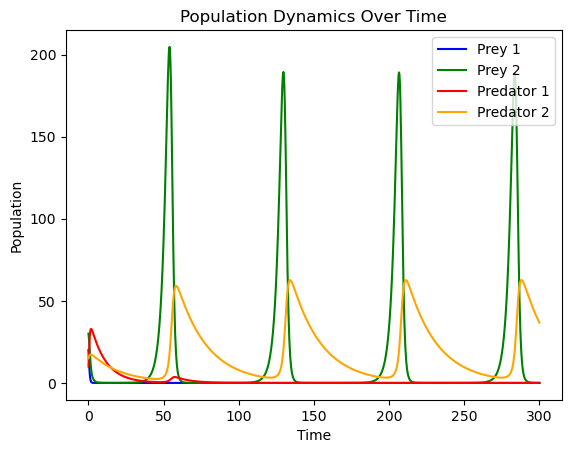

In [39]:
# Model 3a: 2 predators, 2 prey, each predator can eat each prey, without predator-predator killing

# x1 = population density of prey 1
# x2 = population density of prey 2
# y1 = population density of predator 1
# y2 = population density of predator 2

# Initializing parameters
a1 = 0.5 # prey 1 growth rate
a2 = 0.4 # prey 2 growth rate

b11 = 0.06 # predator 1 kill rate of prey 1
b12 = 0.03 # predator 1 kill rate of prey 2
b21 = 0.05 # predator 2 kill rate of prey 1
b22 = 0.02 # predator 2 kill rate of prey 2

c1 = 0.1 # predator 1 death rate
c2 = 0.05 # predator 2 death rate

d11 = 0.1 # predator 1 growth rate from eating prey 1
d12 = 0.05 # predator 1 growth rate from eating prey 2
d21 = 0.01 # predator 2 growth rate from eating prey 1
d22 = 0.15 # predator 2 growth rate from eating prey 2

# Defining Lotka-Volterra differential equations
def dSdt(S, t):
    x1, x2, y1, y2 = S
    return [a1*x1 - b11*x1*y1 - b21*x1*y2, 
            a2*x2 - b12*x2*y1 - b22*x2*y2,
            -c1*y1 + d11*x1*y1 + b21*d12*x2*y1,
            -c2*y2 + d21*x1*y2 + b22*d22*x2*y2
            ]

# Initializing population densities
x10 = 20
x20 = 30
y10 = 10
y20 = 15

S0 = (x10, x20, y10, y20)

t = np.linspace(0, 300, 1000) # time array

# Solving differential equations
sol1 = odeint(dSdt, S0, t)
x1, x2, y1, y2 = sol1.T

# Plotting populations over time
plt.plot(t, x1, label = "Prey 1", color = "blue")
plt.plot(t, x2, label = "Prey 2", color = "green")
plt.plot(t, y1, label = "Predator 1", color = "red")
plt.plot(t, y2, label = "Predator 2", color = "orange")
plt.legend()
plt.xlabel("Time")
plt.ylabel("Population")
plt.title("Population Dynamics Over Time")
plt.show()

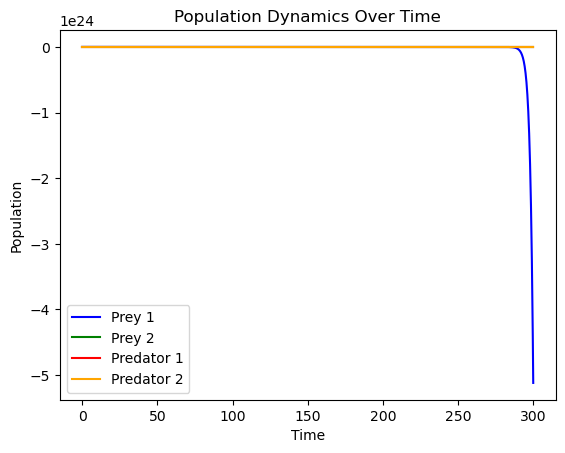

In [40]:
# Model 3b: 2 predators, 2 prey, each predator can eat each prey, with predator-predator killing

# Initializing parameters
a1 = 0.5 # prey 1 growth rate
a2 = 0.4 # prey 2 growth rate

b11 = 0.02 # predator 1 kill rate of prey 1
b12 = 0.03 # predator 1 kill rate of prey 2
b21 = 0.02 # predator 2 kill rate of prey 1
b22 = 0.02 # predator 2 kill rate of prey 2

c1 = 0.1 # predator 1 death rate
c2 = 0.1 # predator 2 death rate

d11 = 0.1 # predator 1 growth rate from eating prey 1
d12 = 0.05 # predator 1 growth rate from eating prey 2
d21 = 0.01 # predator 2 growth rate from eating prey 1
d22 = 0.15 # predator 2 growth rate from eating prey 2

e12 = 0.01 # predator 1 kill rate of predator 2
e21 = 0.02 # predator 2 kill rate of predator 1

# Defining Lotka-Volterra differential equations
def dSdt(S, t):
    x1, x2, y1, y2 = S
    
    return [a1*x1 - b11*x1*y1 - b21*x1*y2, 
            a2*x2 - b12*x2*y1 - b22*x2*y2,
            -c1*y1 + d11*x1*y1 + b21*d12*x2*y1 - e12*y1*y2,
            -c2*y2 + d21*x1*y2 + b22*d22*x2*y2 - e21*y1*y2
           ]

# Initializing population densities
x10 = 60
x20 = 50
y10 = 15
y20 = 20

S0 = (x10, x20, y10, y20)

t = np.linspace(0, 300, 1000) # time array

sol2 = odeint(dSdt, S0, t) # solving differential equations
x1, x2, y1, y2 = sol2.T

# Plotting populations over time
plt.plot(t, x1, label = "Prey 1", color = "blue")
plt.plot(t, x2, label = "Prey 2", color = "green")
plt.plot(t, y1, label = "Predator 1", color = "red")
plt.plot(t, y2, label = "Predator 2", color = "orange")
plt.legend()
plt.xlabel("Time")
plt.ylabel("Population")
plt.title("Population Dynamics Over Time")
plt.show()

# If predator-predator kill rates are too high, or predator populations are too high, increased competition will lead
# to predator extinction and unnaturally high growth of prey population.

# Extremely sensitive to parameter changes, extinction likely.

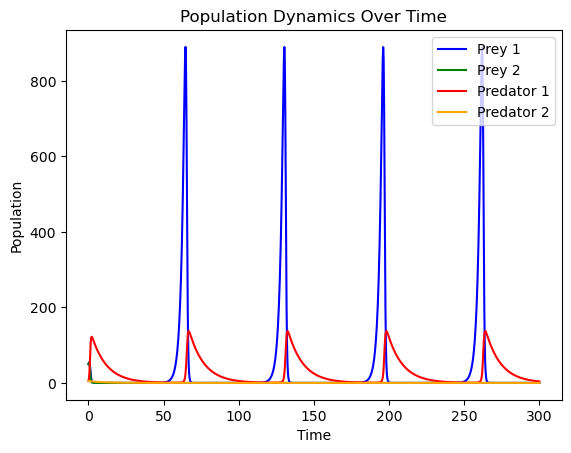

In [41]:
# Model 3c: 2 predators, 2 prey, predator 1 can eat both prey, predator 2 can eat only prey 1, without predator-predator killing

# Initializing parameters
a1 = 0.5 # prey 1 growth rate
a2 = 0.4 # prey 2 growth rate

b11 = 0.02 # predator 1 kill rate of prey 1
b12 = 0.03 # predator 1 kill rate of prey 2
b21 = 0.02 # predator 2 kill rate of prey 1

c1 = 0.1 # predator 1 death rate
c2 = 0.1 # predator 2 death rate

d11 = 0.1 # predator 1 growth rate from eating prey 1
d12 = 0.05 # predator 1 growth rate from eating prey 2
d21 = 0.01 # predator 2 growth rate from eating prey 1

# Defining Lotka-Volterra differential equations
def dSdt(S, t):
    x1, x2, y1, y2 = S
    
            # Prey populations
    return [a1*x1 - b11*x1*y1 - b21*x1*y2, 
            a2*x2 - b12*x2*y1,

            # Predator populations
            -c1*y1 + b11*d11*x1*y1 + d12*x2*y1,
            -c2*y2 + b12*d21*x1*y2
           ]

# Initializing population densities
x10 = 50
x20 = 50
y10 = 5
y20 = 5

S0 = (x10, x20, y10, y20)

t = np.linspace(0, 300, 1000) # time array

sol3 = odeint(dSdt, S0, t) # solving differential equations
x1, x2, y1, y2 = sol3.T

# Plotting populations over time
plt.plot(t, x1, label = "Prey 1", color = "blue")
plt.plot(t, x2, label = "Prey 2", color = "green")
plt.plot(t, y1, label = "Predator 1", color = "red")
plt.plot(t, y2, label = "Predator 2", color = "orange")
plt.legend()
plt.xlabel("Time")
plt.ylabel("Population")
plt.title("Population Dynamics Over Time")
plt.show()

# Predator 2 extinction much more likely due to increased competition for prey 1
# Prey 2 population grows as there is less competition for it

# If predator-predator killing were also to be added to the model, predator extinction is almost certain